<a href="https://colab.research.google.com/github/radar101/SEM-8/blob/main/Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [2]:
df = pd.read_csv("GOOGL.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [4]:
data = df['Close'].values
data = data.reshape(-1, 1)

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [31]:
train_data = scaled_data[: int(len(scaled_data) * 0.8)]
test_data = scaled_data[int(len(scaled_data) * 0.8) : ]

In [34]:
def createdataset(data, step=4):
  x, y = [], []
  for i in range(len(data) - step):
    x.append(data[i : i+step, 0])
    y.append(data[i+step, 0])
  x = np.array(x)
  y = np.array(y);
  return x,y

In [35]:
x_train, y_train = createdataset(train_data)
x_test, y_test = createdataset(test_data)

In [36]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 4, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.fit(x_train, y_train, epochs=50, batch_size=4)

Epoch 1/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0014 - mae: 0.0163
Epoch 2/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 3.3038e-05 - mae: 0.0042
Epoch 3/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 3.4456e-05 - mae: 0.0042
Epoch 4/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 3.5347e-05 - mae: 0.0043
Epoch 5/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 3.3844e-05 - mae: 0.0043
Epoch 6/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 3.1523e-05 - mae: 0.0041
Epoch 7/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 2.7754e-05 - mae: 0.0038
Epoch 8/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 3.2164e-05 - mae: 0.0040
Epoch 9/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 2.5273e-05 - mae: 0.0035
Epoch 10/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 2.4517e-05 - mae: 0.0036
Epoch 11/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 2.8481e-05 - mae: 0.0039
Epoch 12/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 2.3

In [39]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(mse)
print(mae)

9797.620158816017
65.90945314271305


[]

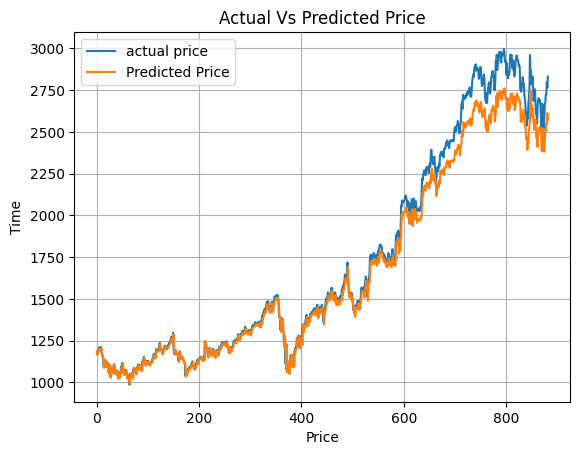

In [42]:
plt.plot(y_test,label='actual price')
plt.plot(y_pred,label='Predicted Price')
plt.title('Actual Vs Predicted Price')
plt.xlabel('Price')
plt.ylabel('Time')
plt.legend()
plt.grid(True)
plt.plot()



Q1: What is a Recurrent Neural Network?
A: RNN is a type of neural network designed for sequential data, where previous output can influence current predictions. It maintains memory through hidden states.

Q2: Why do we use LSTM instead of plain RNN?
A: LSTMs handle long-term dependencies better and solve the vanishing gradient problem common in vanilla RNNs.

Q3: Why do we normalize the data?
A: Normalization scales values to a fixed range (0 to 1) for better model convergence and numerical stability.

Q4: What does each LSTM unit output?
A: Each LSTM unit outputs a hidden state, which can either go to the next LSTM layer or to a dense layer for final prediction.

Q5: Why do we use 60 previous timesteps?
A: It provides the model with enough historical context to learn trends. This is tunable based on dataset and volatility.

Q6: What loss function did you use and why?
A: Mean Squared Error (MSE) because it's suitable for regression tasks where we want to minimize the difference between predicted and actual values.

Q7: Can this model predict multiple days ahead?
A: Currently, it predicts one day ahead. With modifications, it can be extended to multi-step forecasting.

Q8: What are some limitations of this model?
A: It doesn't account for external market factors, news events, or trends. Also, overfitting may occur without validation.

Q9: What’s the difference between time series prediction and regular regression?
A: Time series prediction uses temporal dependencies — the order of data matters — unlike normal regression.

Q10: Can we use CNNs for time series?
A: Yes, 1D CNNs can be used for time series, especially when local temporal features are important.

